In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from os import path
import alphashape
from descartes import PolygonPatch
from shapely.geometry import Point

In [17]:
sections = ['medulla','cortex']
geno = 'human' # human, DKD, WT, UMOD-KI, UMOD-WT, where DKD refers to BTBR ob/ob and WT to BTBR wt/wt
# txt file listing unique ids for arrays of specified genotype
puckids = list(pd.read_csv('to_process_all_{geno}.txt'.format(geno=geno.replace('-','')),header=None)[0])

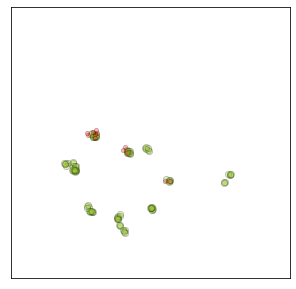

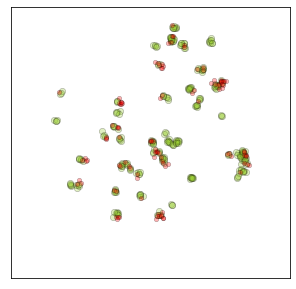

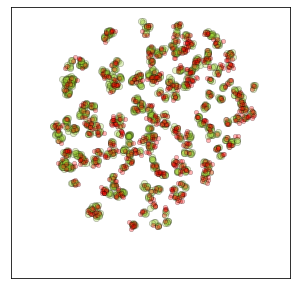

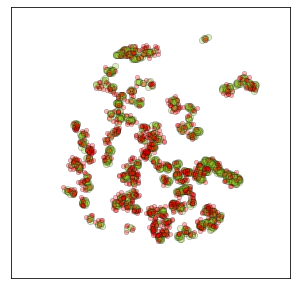

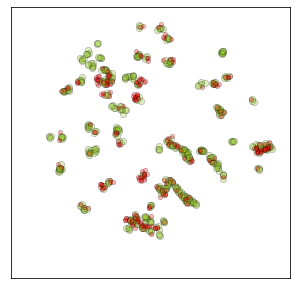

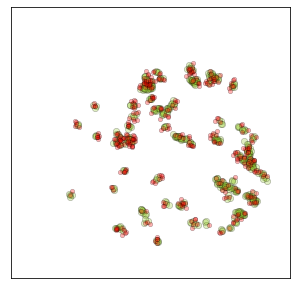

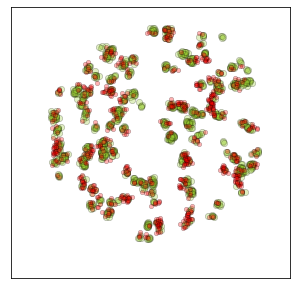

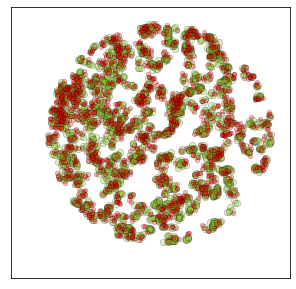

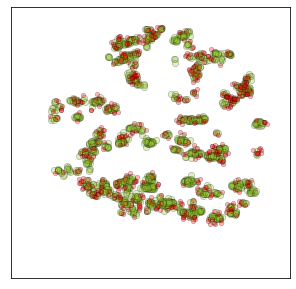

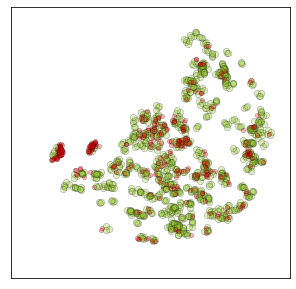

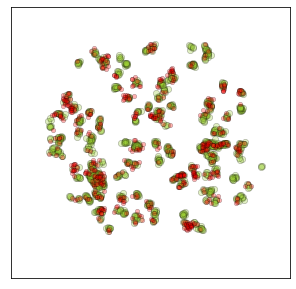

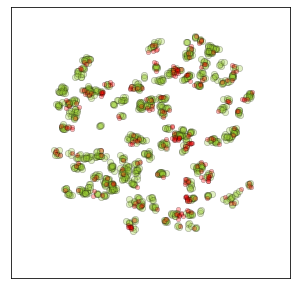

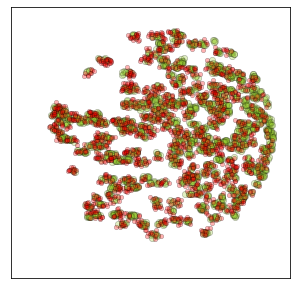

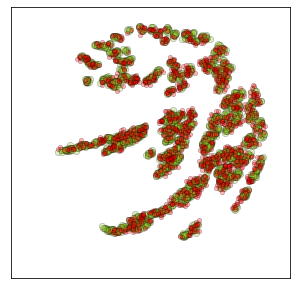

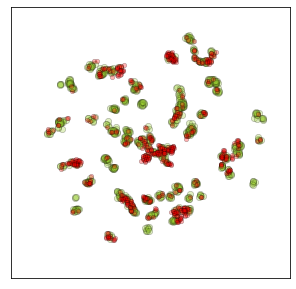

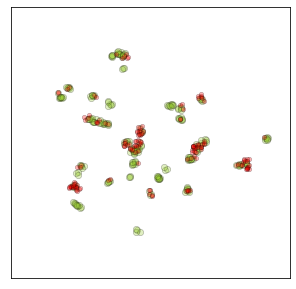

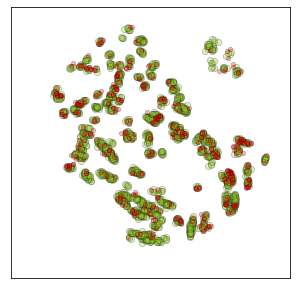

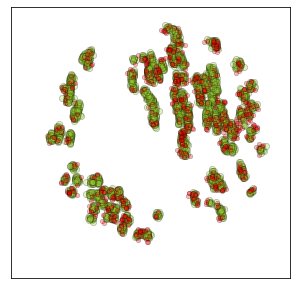

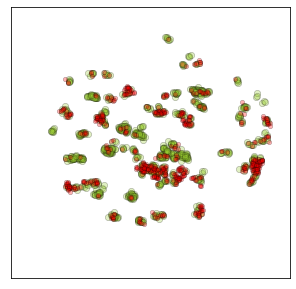

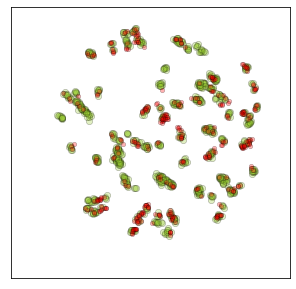

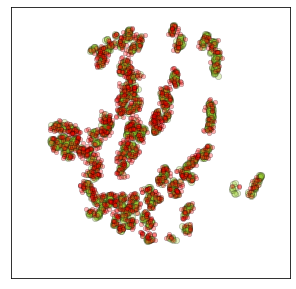

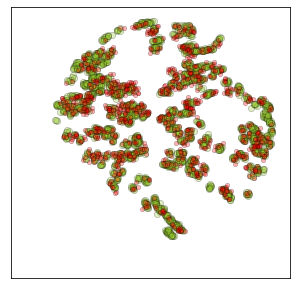

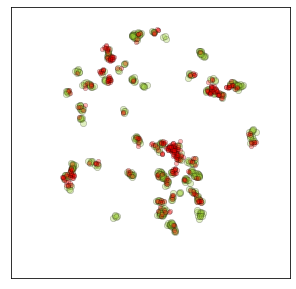

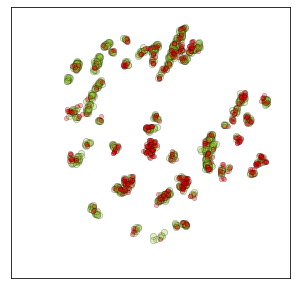

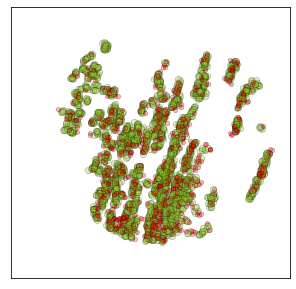

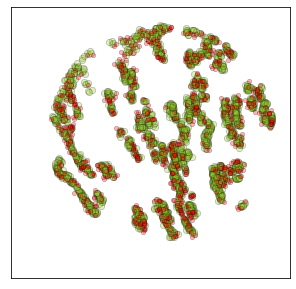

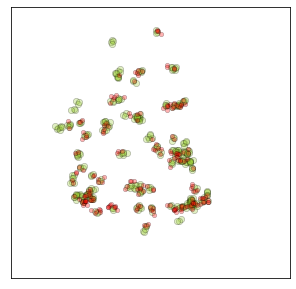

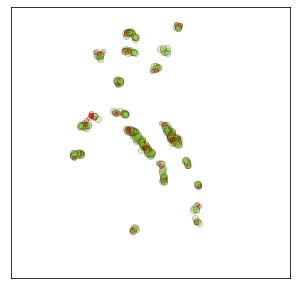

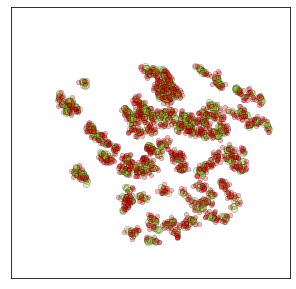

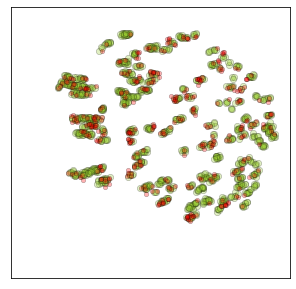

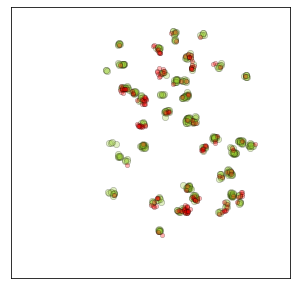

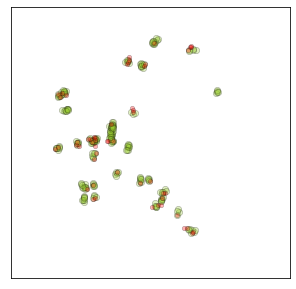

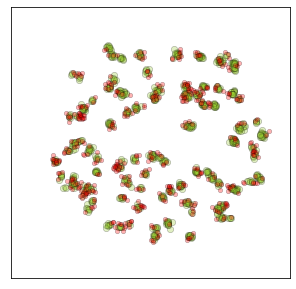

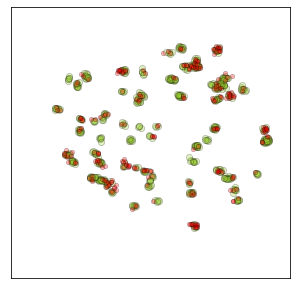

In [18]:
for puckid in puckids:
    celltype = 'CDPC'
    # input_path is path to file with beads x features for all beads classified as CDPC
    # features = {'barcode','x','y','clusters'}, where cluster is cluster assigned via kmeans clustering 
    # during partitions assignment
    input_path = '{celltype}_info.csv'.format(celltype = celltype)

    if path.exists(input_path):
        CDPC_info = pd.read_csv(input_path,index_col=0)

        celltype = 'CDIC'
        # input_path is path to file with beads x features for all beads classified as CDIC
        # features = {'barcode','x','y','clusters','section'}, where cluster is cluster assigned via kmeans clustering 
        # during partition assignment
        input_path = '{celltype}_info.csv'.format(celltype = celltype)
        if path.exists(input_path):
            CDIC_info = pd.read_csv(input_path,index_col=0)
            for section in sections:
                CDIC_info_section = CDIC_info[CDIC_info['section']==section].copy()
                CDPC_info_section = CDPC_info[CDPC_info['section']==section].copy()

                out_path = '/broad/grekalab/teia/kidney_slideseq_analysis/paper_figures/cell_partitions/{pheno}/{puckid}_CDIC_{section}_partitions.pdf'.format(pheno=pheno,celltype=celltype,section=section,puckid=puckid)
                plt.figure(figsize=(5,5))
                plt.scatter(CDPC_info_section['x'],CDPC_info_section['y'],s=40,c='yellowgreen',ec='black',linewidth=0.6,alpha=0.3)
                plt.scatter(CDIC_info_section['x'],CDIC_info_section['y'],s=20,c='red',ec='black',linewidth=0.6,alpha=0.3)
                plt.xticks([])
                plt.yticks([])
                plt.xlim(0,6000)
                plt.ylim(0,6000)
                plt.savefig(out_path,dpi=300,bbox_inches='tight')
                plt.show()